# Problem Statement

An open source data from Kaggle - HR Analytics data, is used for the below classification method.

Using the given data attributes, we are trying to build a classification model using Logistic Regression algorithm on the variable which denotes if the employee left the organization.
We can also explore and analyze the data to see if there are any hidden trends or implications. For instance, we can identify  the key attributes which drive the employee churn.

## Data Loading 

In [2]:
#import libraries

import os
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
sns.set()

__author__ = "Anup C"

In [3]:
os.getcwd()

'/s/achitike'

In [4]:
raw_data = pd.read_csv("HR_comma_sep.csv")

In [5]:
raw_data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

In [6]:
raw_data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
raw_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
raw_data.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [9]:
raw_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Create Dummy Variables

In [10]:
raw_data_dummy = pd.get_dummies(raw_data, drop_first=True)
raw_data_dummy.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Check for multicollinearity

In [11]:
variables = raw_data_dummy.drop(['left'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,6.651212,satisfaction_level
1,21.379123,last_evaluation
2,13.990648,number_project
3,20.120382,average_montly_hours
4,6.862384,time_spend_company
5,1.174650,Work_accident
6,1.057640,promotion_last_5years
7,1.510446,Department_RandD
8,1.483042,Department_accounting
9,1.465988,Department_hr


## Split the data to test & train

In [12]:
targets = raw_data_dummy['left']
inputs = raw_data_dummy.drop(['left'],axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
inputs_scaled = scaler.transform(inputs)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 40)

## Create a Logistic Regression

In [16]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(x_train, y_train)

In [17]:
logistic_model.score(x_train, y_train)

0.7971497624802066

## Testing the Regression & Measuring Accuracy

In [18]:
y_pred = logistic_model.predict(x_test)

### Confusion Matrix

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[2121,  183],
       [ 440,  256]])

In [20]:
print('Accuracy based on Confusion Matrix : =', (2121+256)/(2121+256+440+183))

Accuracy based on Confusion Matrix : = 0.7923333333333333


### Area Under Curve

In [21]:
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred))

0.7923333333333333


In [22]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.644


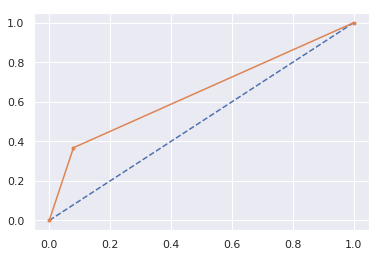

In [23]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## Weights

In [31]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = np.transpose(logistic_model.coef_)
reg_summary

,Features,Weights
0,satisfaction_level,-1.049804
1,last_evaluation,0.121611
2,number_project,-0.397179
3,average_montly_hours,0.214282
4,time_spend_company,0.384631
5,Work_accident,-0.543503
6,promotion_last_5years,-0.177027
7,Department_RandD,-0.097421
8,Department_accounting,0.036845
9,Department_hr,0.092519


# Summary

In the above case, we haven't explored multiple regressions to try the best fit.

We've tried the Logistic Regression equation to fit in the use case and the results were not too bad.

The model scored 79% accuracy and this is the same score we get using a confusion matrix as well.
Also, the AUC 0f 0.64 says that this not a great model. 

This opens up to the thought of trying out other classification models which will be further explored on my GitHub page !!

### Results Interpretation

- Employees with low salaries have the highest weight and are more likely to leave the company
- Employees with high satisfaction are more likely to stay back
- Employees in management role are more likely to stay back
- With very less significance we can say that employees spending more hours at work are likely to churn
- There are also decent amount of employees who are ready to churn and have spent a fair amount of time in the organization

All in all there is a need for the HR team to combine all the above attributes to find a pattern and control the churn.
For instance - Employees who are spending more hours can be offered some incentives like pay rise to control the churn rate. Similarly, feedback from employees with low satisfaction has to be considered in changing the work style to retain them.


###### As mentioned above there is a necessity to re-visit the entire process with a better classification model for more accurate results. There is a chance of capturing better information and even the interpretation results would be more clear - Watch out the other models on my GitHub portfolio to check this out !!
